<a href="https://colab.research.google.com/github/Muhammadridho100902/google_collab/blob/main/Udemy_course_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import zipfile

! chmod 600 /content/kaggle.json
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d andrewmvd/udemy-courses


  0% 0.00/200k [00:00<?, ?B/s]
100% 200k/200k [00:00<00:00, 112MB/s]


In [ ]:
zip_file = zipfile.ZipFile('/content/udemy-courses.zip', 'r')
zip_file.extractall('/content/')

In [ ]:
data = pd.read_csv('/content/udemy_courses.csv')
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [ ]:
data.shape

(3678, 12)

In [ ]:
data.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

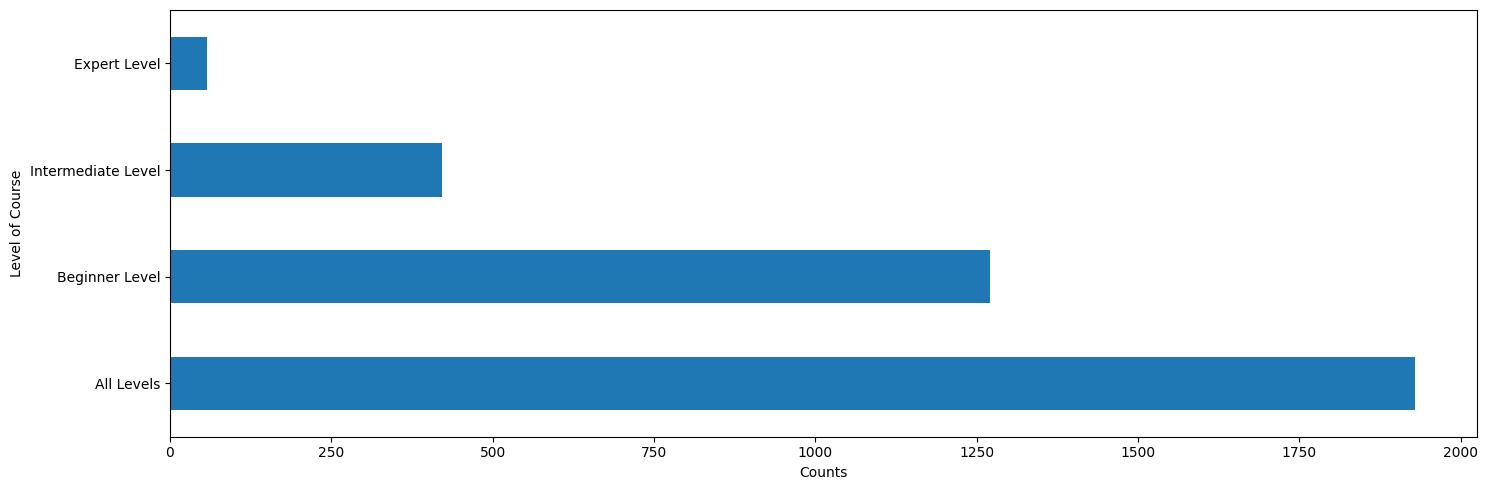

In [ ]:
plt.figure(figsize=(15,5))
data['level'].value_counts().plot(kind='barh')
plt.xlabel('Counts')
plt.ylabel('Level of Course')
plt.tight_layout()
plt.show()

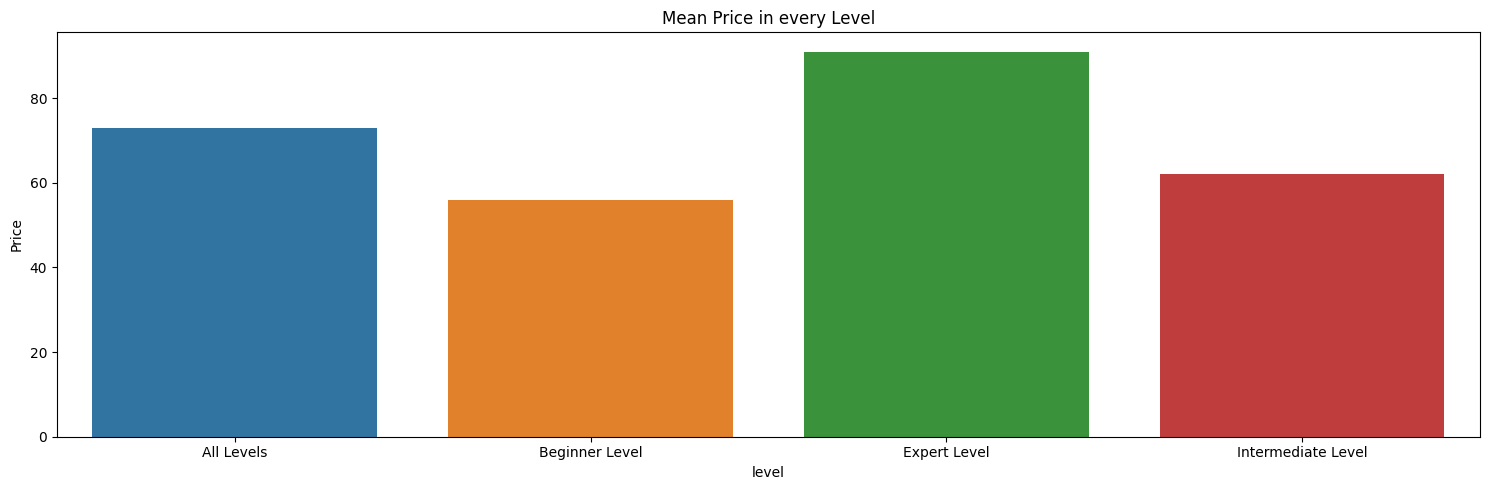

In [ ]:
level_group = round(data.groupby('level')['price'].mean())

plt.figure(figsize=(15,5))
sns.barplot(x=level_group.index, y=level_group.values)
plt.title('Mean Price in every Level')
plt.ylabel("Price")
plt.tight_layout()
plt.show()

In [ ]:
def levelsegment(subject, content):
  filltered_data = data[data[subject] == content]
  plt.figure(figsize=(15,5))
  result = sns.countplot(data=filltered_data, x=subject, hue='level')
  plt.xlabel('')
  plt.tight_layout()
  plt.show()
  return result

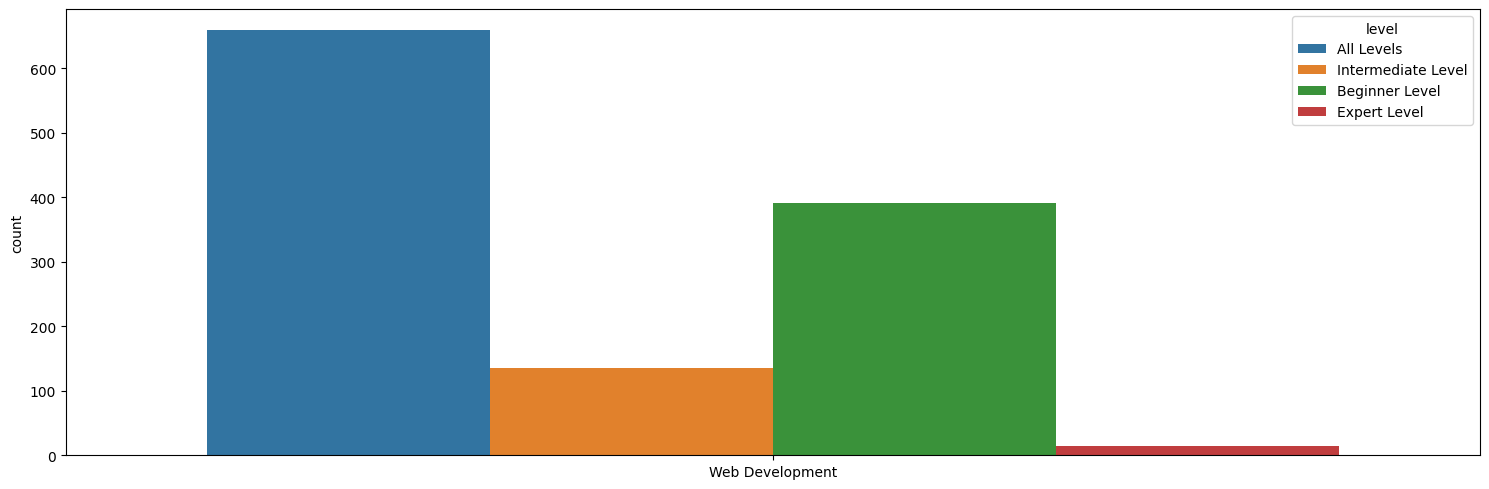

<Axes: ylabel='count'>

In [ ]:
levelsegment('subject', 'Web Development')

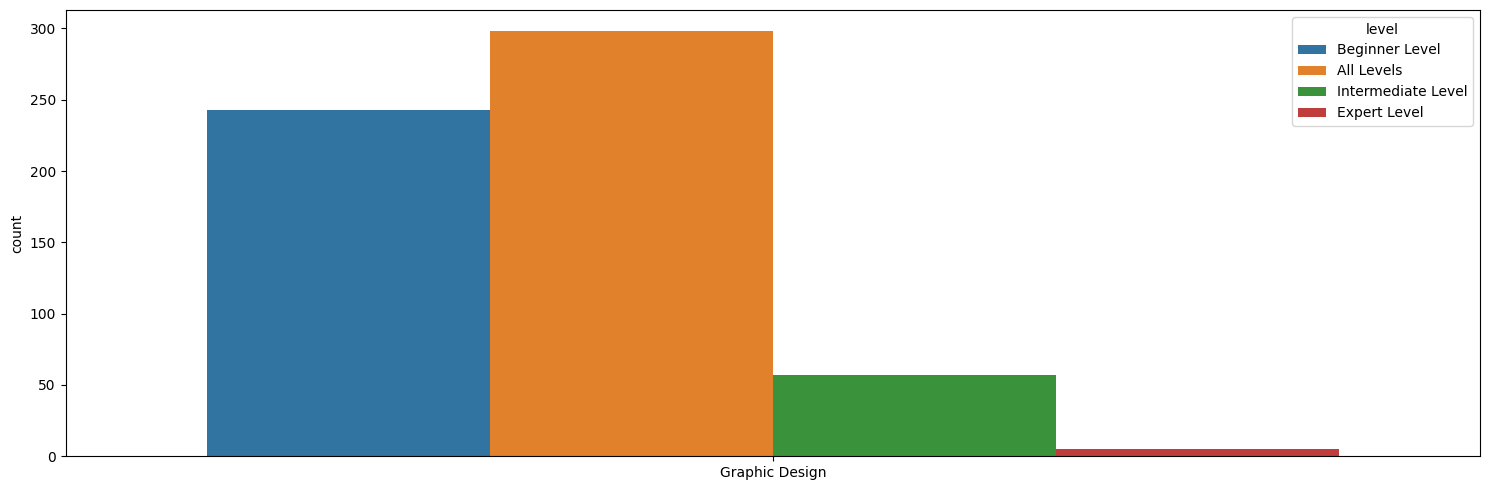

<Axes: ylabel='count'>

In [ ]:
levelsegment('subject', 'Graphic Design')

In [ ]:
def paidsegment(subject, content):
  filltered_data = data[data[subject] == content]
  plt.figure(figsize=(15,5))
  result = sns.countplot(data=filltered_data, x=subject, hue='is_paid')
  plt.xlabel('')
  plt.tight_layout()
  plt.show()
  return result

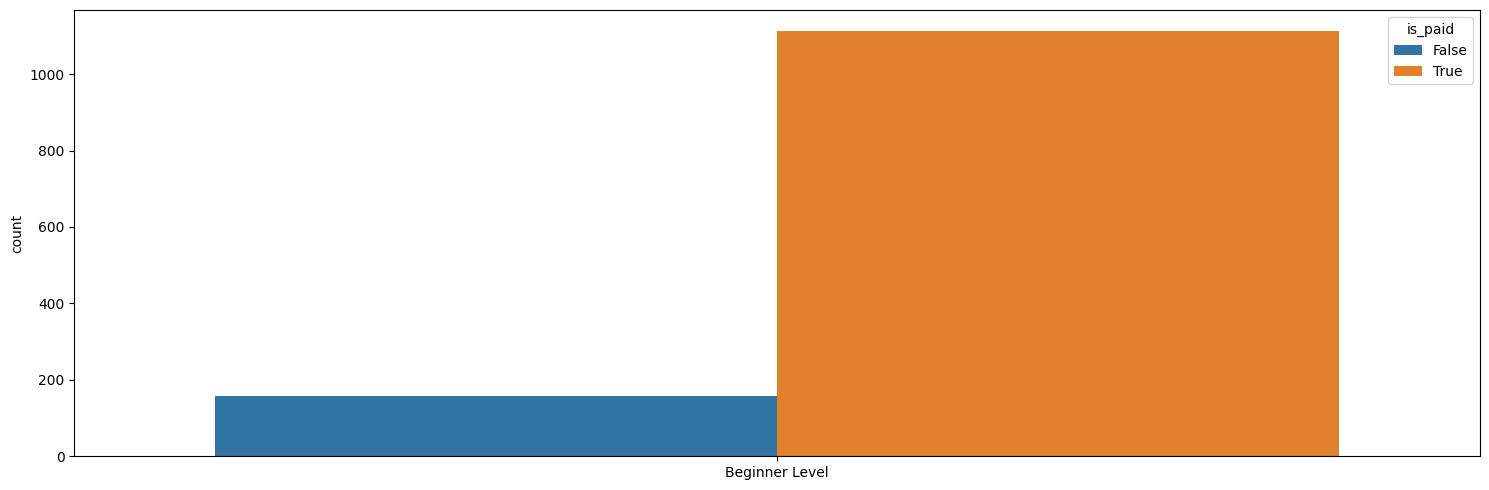

<Axes: ylabel='count'>

In [ ]:
paidsegment('level', 'Beginner Level')

In [ ]:
data_programming = data[(data['course_title'].str.contains('Python')) |
                    (data['course_title'].str.contains('SQL')) |
                    (data['course_title'].str.contains('HTML5')) |
                    (data['course_title'].str.contains('CSS')) |
                    (data['course_title'].str.contains('JavaScript')) |
                    (data['course_title'].str.contains('PHP'))
                    ]
data_programming.shape

(388, 12)

In [ ]:
data_programming.loc[:, 'language'] = data_programming['course_title'].str.extract(r'(Python|SQL|HTML5|CSS|JavaScript|PHP)', expand=False)
data_programming['language'].value_counts()

<ipython-input-15-7686771c89cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_programming.loc[:, 'language'] = data_programming['course_title'].str.extract(r'(Python|SQL|HTML5|CSS|JavaScript|PHP)', expand=False)


JavaScript    102
PHP            96
CSS            90
HTML5          64
Python         29
SQL             7
Name: language, dtype: int64

In [ ]:
def languageanalyst(hue):
  plt.figure(figsize=(15,5))
  sns.countplot(data=data_programming, y='language', hue=hue)
  plt.ylabel('')
  # plt.title('Most Programming Language in Course')
  plt.tight_layout()
  plt.show()

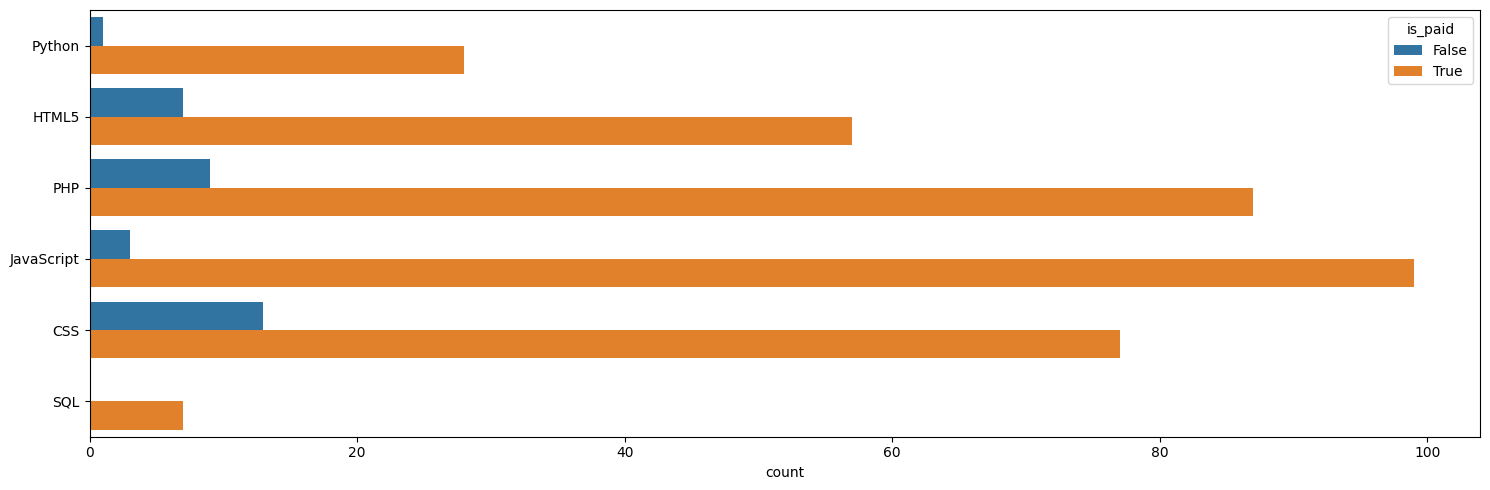

In [ ]:
languageanalyst('is_paid')

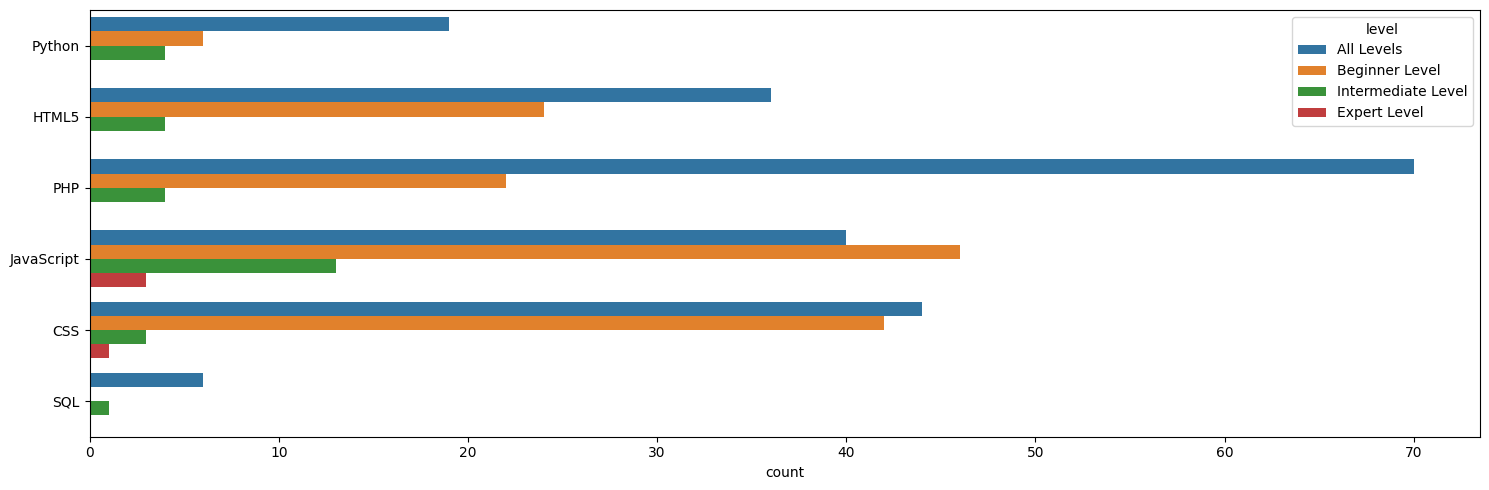

In [ ]:
languageanalyst('level')

In [ ]:
def levelaggregat(content):
  mean_data = round(data_programming.groupby('language')[content].mean())
  plt.figure(figsize=(15,5))
  sns.barplot(x=mean_data.index, y=mean_data.values)
  plt.title(f'Mean {content} for Programming Language in this Course')
  plt.show()

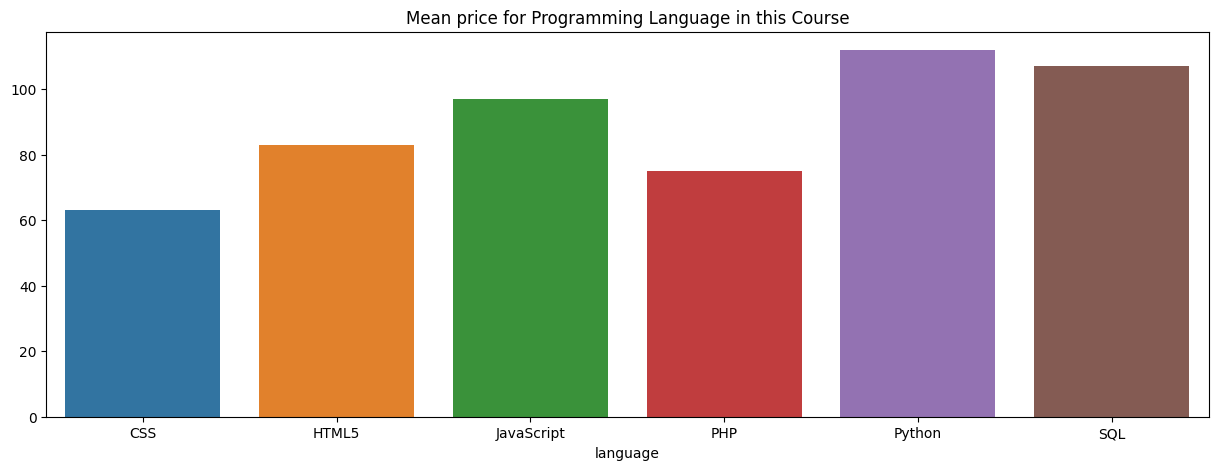

In [ ]:
levelaggregat('price')

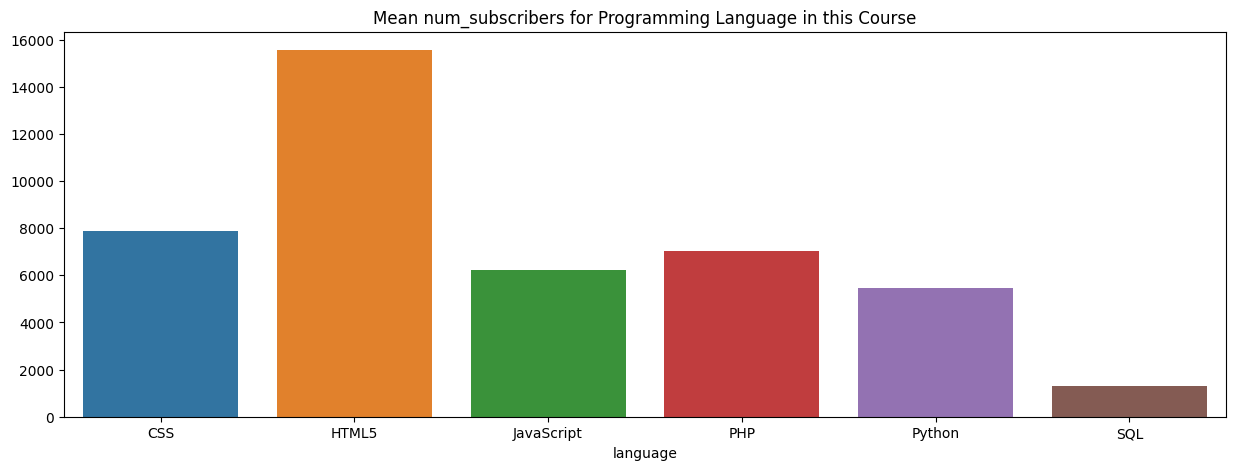

In [ ]:
levelaggregat('num_subscribers')

In [ ]:
counts = data_programming['language'].value_counts()
counts

JavaScript    102
PHP            96
CSS            90
HTML5          64
Python         29
SQL             7
Name: language, dtype: int64

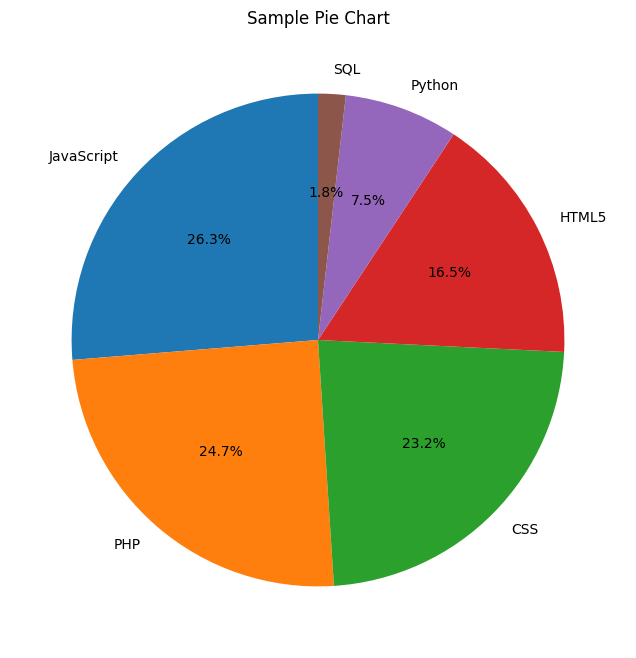

In [ ]:
plt.figure(figsize=(8, 8))  # Optional: Set the size of the figure (width, height)

# Create the pie chart with the given data and labels
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)

# Optional: Add a title to the pie chart
plt.title('Sample Pie Chart')

# Show the pie chart
plt.show()


In [ ]:
data_programming.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
language                object
dtype: object

In [ ]:
data_programming['month'] = data['published_timestamp'].str[5:7]
data_programming['year'] = data['published_timestamp'].str[:4]
data_programming.head()

<ipython-input-25-3bec612000b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_programming['month'] = data['published_timestamp'].str[5:7]
<ipython-input-25-3bec612000b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_programming['year'] = data['published_timestamp'].str[:4]


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language,month,year
14,1196544,Python Algo Trading: Sentiment Trading with News,https://www.udemy.com/hedge-fund-strategy-trad...,True,200,294,19,42,All Levels,7.0,2017-04-28T16:41:44Z,Business Finance,Python,04,2017
30,1170894,Python Algo Stock Trading: Automate Your Trading!,https://www.udemy.com/algorithmic-stock-tradin...,True,95,1165,21,41,Beginner Level,2.5,2017-05-28T23:41:03Z,Business Finance,Python,05,2017
41,1035472,Python for Finance: Investment Fundamentals & ...,https://www.udemy.com/python-for-finance-inves...,True,195,3811,278,103,All Levels,6.5,2017-03-30T22:17:09Z,Business Finance,Python,03,2017
147,1070886,Python Algo Trading: FX Trading with Oanda,https://www.udemy.com/python-algo-trading-fx-t...,True,200,453,42,33,Intermediate Level,3.0,2017-03-14T00:39:45Z,Business Finance,Python,03,2017
334,815482,Stock Technical Analysis with Python,https://www.udemy.com/stock-technical-analysis...,True,50,409,35,46,All Levels,8.0,2016-04-12T00:40:03Z,Business Finance,Python,04,2016


In [ ]:
python_year_over_year = data_programming[data_programming['language'] == 'Python']
python_year_over_year.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language,month,year
14,1196544,Python Algo Trading: Sentiment Trading with News,https://www.udemy.com/hedge-fund-strategy-trad...,True,200,294,19,42,All Levels,7.0,2017-04-28T16:41:44Z,Business Finance,Python,04,2017
30,1170894,Python Algo Stock Trading: Automate Your Trading!,https://www.udemy.com/algorithmic-stock-tradin...,True,95,1165,21,41,Beginner Level,2.5,2017-05-28T23:41:03Z,Business Finance,Python,05,2017
41,1035472,Python for Finance: Investment Fundamentals & ...,https://www.udemy.com/python-for-finance-inves...,True,195,3811,278,103,All Levels,6.5,2017-03-30T22:17:09Z,Business Finance,Python,03,2017
147,1070886,Python Algo Trading: FX Trading with Oanda,https://www.udemy.com/python-algo-trading-fx-t...,True,200,453,42,33,Intermediate Level,3.0,2017-03-14T00:39:45Z,Business Finance,Python,03,2017
334,815482,Stock Technical Analysis with Python,https://www.udemy.com/stock-technical-analysis...,True,50,409,35,46,All Levels,8.0,2016-04-12T00:40:03Z,Business Finance,Python,04,2016


In [ ]:
# value_count = data_programming.groupby('language')['year'].value_counts()
# df = pd.DataFrame(value_count)
# # df.columns = df.droplevel(0)
# df

In [ ]:
# sns.lineplot(x=value_count)
# plt.show()

NameError: ignored